In [1]:
import pandas as pd
import gc
import time

In [2]:
data = pd.read_pickle("df_completeMy_test.pkl")
data

,date_block_num,shop_id,item_id,item_cnt_month,category_id,cat_type_code,cat_subtype_code,shop_city_code,shop_type_code,item_cnt_month_lag_1,...,date_shop_subtype_avg_item_cnt_lag_2,date_shop_subtype_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_6,date_shop_subtype_avg_item_cnt_lag_12,delta_price_lag,month,days,item_shop_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,19,8,46,0,0,0.0,...,0.521973,0.634766,0.552246,0.519043,-0.282715,0,31,1,12,12
4488711,12,2,30,0.0,40,5,22,0,0,0.0,...,0.022934,0.021286,0.038971,0.000000,-0.483398,0,31,1,11,11
4488712,12,2,31,0.0,37,5,10,0,0,0.0,...,0.048462,0.035156,0.026535,0.000000,-0.137451,0,31,1,11,11
4488713,12,2,32,1.0,40,5,22,0,0,0.0,...,0.022934,0.021286,0.038971,0.073120,-0.407227,0,31,-1,12,12
4488714,12,2,33,1.0,37,5,10,0,0,1.0,...,0.048462,0.035156,0.026535,0.085632,-0.225464,0,31,1,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11056225,34,45,18454,0.0,55,11,15,18,0,1.0,...,0.074524,0.106079,0.127563,0.000000,-0.475098,10,30,1,11,11
11056226,34,45,16188,0.0,64,9,11,18,0,0.0,...,0.117126,0.000000,0.000000,0.000000,0.081116,10,30,-1,2,2
11056227,34,45,15757,0.0,55,11,15,18,0,0.0,...,0.074524,0.106079,0.127563,0.156982,0.155884,10,30,1,34,34
11056228,34,45,19648,0.0,40,5,22,18,0,0.0,...,0.074097,0.111633,0.082214,0.000000,-0.091736,10,30,-1,11,11


In [97]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [98]:
Y_train = Y_train.clip(0, 20)
Y_valid = Y_valid.clip(0, 20)

In [5]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [6]:
!pip install xgboost

In [7]:
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams

In [8]:

ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

time.time() - ts

[0]	validation_0-rmse:1.15384	validation_1-rmse:1.11597
[1]	validation_0-rmse:1.10421	validation_1-rmse:1.07770
[2]	validation_0-rmse:1.05651	validation_1-rmse:1.04689
[3]	validation_0-rmse:1.02149	validation_1-rmse:1.01994
[4]	validation_0-rmse:0.98913	validation_1-rmse:0.99826
[5]	validation_0-rmse:0.96035	validation_1-rmse:0.97855
[6]	validation_0-rmse:0.93720	validation_1-rmse:0.96417
[7]	validation_0-rmse:0.91975	validation_1-rmse:0.95290
[8]	validation_0-rmse:0.90037	validation_1-rmse:0.94212
[9]	validation_0-rmse:0.88459	validation_1-rmse:0.93404
[10]	validation_0-rmse:0.87135	validation_1-rmse:0.92711
[11]	validation_0-rmse:0.85923	validation_1-rmse:0.92293
[12]	validation_0-rmse:0.84877	validation_1-rmse:0.91846
[13]	validation_0-rmse:0.84010	validation_1-rmse:0.91535
[14]	validation_0-rmse:0.83229	validation_1-rmse:0.91193
[15]	validation_0-rmse:0.82567	validation_1-rmse:0.90963
[16]	validation_0-rmse:0.81895	validation_1-rmse:0.90750
[17]	validation_0-rmse:0.81330	validation

731.4858553409576

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

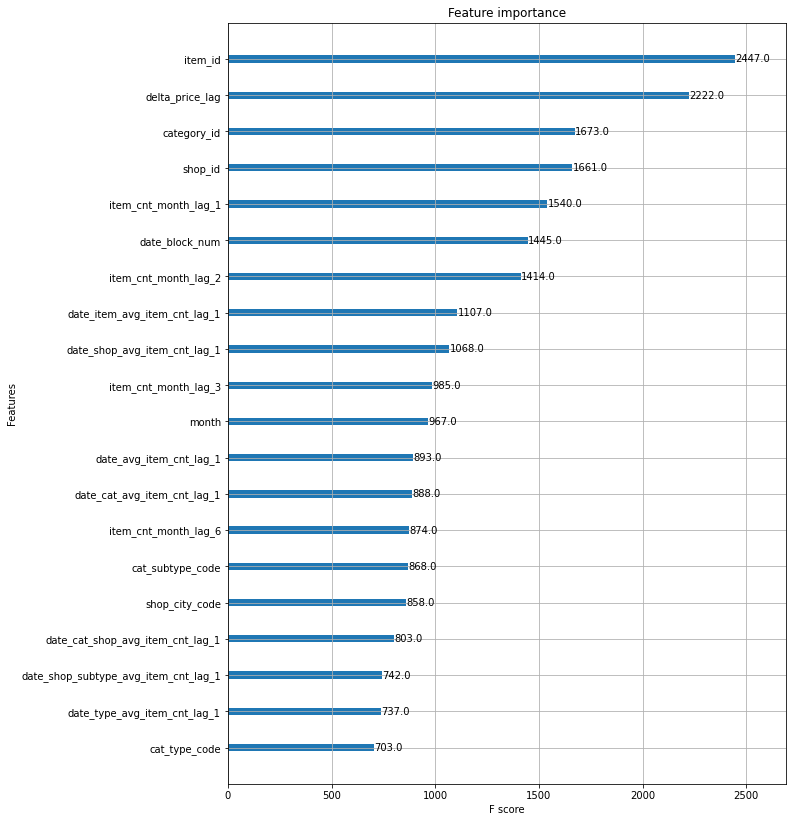

In [14]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, max_num_features=20)

plot_features(model, (10,14))

In [16]:
model.feature_importances_[0]

0.00656241

In [21]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]['columns']

8                     item_cnt_month_lag_1
58       date_shop_item_avg_item_cnt_lag_1
73                         item_first_sale
3                              category_id
10                    item_cnt_month_lag_3
53       date_item_city_avg_item_cnt_lag_1
43       date_item_type_avg_item_cnt_lag_1
18            date_item_avg_item_cnt_lag_1
59       date_shop_item_avg_item_cnt_lag_2
69                                   month
33        date_cat_shop_avg_item_cnt_lag_1
4                            cat_type_code
5                         cat_subtype_code
63    date_shop_subtype_avg_item_cnt_lag_1
9                     item_cnt_month_lag_2
72                    item_shop_first_sale
2                                  item_id
71                     item_shop_last_sale
11                    item_cnt_month_lag_6
23            date_shop_avg_item_cnt_lag_1
Name: columns, dtype: object

In [26]:
list(results[:20]['columns'])

['item_cnt_month_lag_1',
 'date_shop_item_avg_item_cnt_lag_1',
 'item_first_sale',
 'category_id',
 'item_cnt_month_lag_3',
 'date_item_city_avg_item_cnt_lag_1',
 'date_item_type_avg_item_cnt_lag_1',
 'date_item_avg_item_cnt_lag_1',
 'date_shop_item_avg_item_cnt_lag_2',
 'month',
 'date_cat_shop_avg_item_cnt_lag_1',
 'cat_type_code',
 'cat_subtype_code',
 'date_shop_subtype_avg_item_cnt_lag_1',
 'item_cnt_month_lag_2',
 'item_shop_first_sale',
 'item_id',
 'item_shop_last_sale',
 'item_cnt_month_lag_6',
 'date_shop_avg_item_cnt_lag_1']

In [89]:
data_modified=data
Unimportant_feature = []
for i in X_train.columns:

    if i not in list(results[:40]['columns']) and i != 'date_block_num':
        Unimportant_feature.append(i)
        
data_modified = data_modified.drop(columns=Unimportant_feature, axis=1)

In [90]:
X_train = data_modified[data_modified.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data_modified[data_modified.date_block_num < 33]['item_cnt_month']
X_valid = data_modified[data_modified.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data_modified[data_modified.date_block_num == 33]['item_cnt_month']
X_test = data_modified[data_modified.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [92]:
X_train

,date_block_num,shop_id,item_id,category_id,cat_type_code,cat_subtype_code,shop_city_code,shop_type_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_subtype_avg_item_cnt_lag_2,date_shop_subtype_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_6,date_shop_subtype_avg_item_cnt_lag_12,delta_price_lag,month,days,item_shop_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,19,8,46,0,0,0.0,0.0,...,0.521973,0.634766,0.552246,0.519043,-0.282715,0,31,1,12,12
4488711,12,2,30,40,5,22,0,0,0.0,0.0,...,0.022934,0.021286,0.038971,0.000000,-0.483398,0,31,1,11,11
4488712,12,2,31,37,5,10,0,0,0.0,0.0,...,0.048462,0.035156,0.026535,0.000000,-0.137451,0,31,1,11,11
4488713,12,2,32,40,5,22,0,0,0.0,0.0,...,0.022934,0.021286,0.038971,0.073120,-0.407227,0,31,-1,12,12
4488714,12,2,33,37,5,10,0,0,1.0,2.0,...,0.048462,0.035156,0.026535,0.085632,-0.225464,0,31,1,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603853,32,59,22162,40,5,22,29,4,1.0,0.0,...,0.101624,0.124695,0.109802,0.000000,-0.085815,8,30,1,14,14
10603854,32,59,22163,40,5,22,29,4,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.008354,8,30,-1,1,1
10603855,32,59,22164,37,5,10,29,4,0.0,1.0,...,0.093201,0.101807,0.097046,0.000000,-0.114929,8,30,1,7,7
10603856,32,59,22166,54,4,25,29,4,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,8,30,-1,23,23


In [84]:
Y_train = Y_train.clip(0, 20)
Y_valid = Y_valid.clip(0, 20)

In [70]:
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=5, 
    colsample_bytree=0.6, 
    subsample=0.6,
    alpha=0.1,
    eta=0.1,
#     tree_method='gpu_hist',
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:1.15897	validation_1-rmse:1.12480
[1]	validation_0-rmse:1.10985	validation_1-rmse:1.08666
[2]	validation_0-rmse:1.06601	validation_1-rmse:1.05696
[3]	validation_0-rmse:1.03419	validation_1-rmse:1.03307
[4]	validation_0-rmse:1.00518	validation_1-rmse:1.01225
[5]	validation_0-rmse:0.97891	validation_1-rmse:0.99567
[6]	validation_0-rmse:0.95384	validation_1-rmse:0.97771
[7]	validation_0-rmse:0.93361	validation_1-rmse:0.96615
[8]	validation_0-rmse:0.91571	validation_1-rmse:0.95514
[9]	validation_0-rmse:0.90060	validation_1-rmse:0.94683
[10]	validation_0-rmse:0.88936	validation_1-rmse:0.94061
[11]	validation_0-rmse:0.87975	validation_1-rmse:0.93598
[12]	validation_0-rmse:0.87121	validation_1-rmse:0.93041
[13]	validation_0-rmse:0.86314	validation_1-rmse:0.92601
[14]	validation_0-rmse:0.85521	validation_1-rmse:0.92291
[15]	validation_0-rmse:0.84735	validation_1-rmse:0.91978
[16]	validation_0-rmse:0.84261	validation_1-rmse:0.91825
[17]	validation_0-rmse:0.83795	validation

128.57654881477356

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

ts=time.time()
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, Y_train)

time.time() - ts

In [100]:
from sklearn.ensemble import ExtraTreesRegressor

ts = time.time()

model = ExtraTreesRegressor(
    random_state=10,
    max_depth=50,
    min_samples_split=10,
    min_samples_leaf=40,
    verbose=True,
    n_estimators=50)
model.fit(X_train, Y_train)

time.time() - ts

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 87.6min finished


5257.1493268013

In [102]:
test = pd.read_csv('test.csv')
Y_pred = model.predict(X_valid).clip(0,20)
Y_test = model.predict(X_test).clip(0,20)

submission = pd.DataFrame({
    "ID":test.index,
    "item_cnt_month":Y_test
})
submission.to_csv('ext_submission2', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.0s finished


In [103]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
sfs = SFS(LinearRegression(), k_features=70, forward=True, floating=False, scoring='r2', cv=0)
# sfs = SFS(model, k_features=20, forward=True, floating=False, scoring='r2', cv=0)

sfs.fit(X_train, Y_train)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=70,
                          scoring='r2')

D:\anaconda3\envs\Python36\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\anaconda3\envs\Python36\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


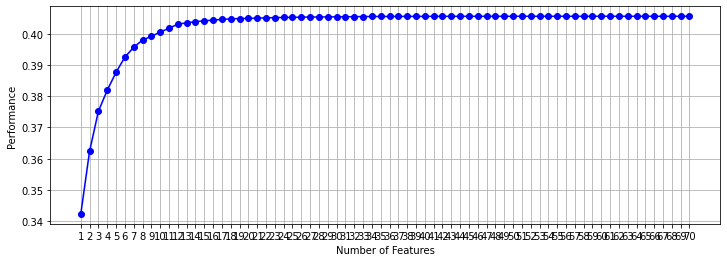

In [104]:


from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()